<a href="https://colab.research.google.com/github/joshuacalloway/dsc540groupproject/blob/main/StartingTrumpTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request, json 

In [41]:
with urllib.request.urlopen("https://www.thetrumparchive.com/latest-tweets") as url:
    data = json.loads(url.read().decode())


In [42]:
data[0]['text']

'Pennsylvania: Biden said that he doesn’t want Fracking. Besides, and more importantly, his handlers won’t allow Fracking. That would be the end of Pennsylvania!'

In [43]:
get_tweet_text = lambda tweet : tweet['text']

tweets = map(get_tweet_text, data)

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/

In [44]:
import tweepy as tw
from textblob import TextBlob

In [45]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [46]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082

In [47]:
from pandas import DataFrame
df = DataFrame(data)
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,1323021747248005120,Pennsylvania: Biden said that he doesn’t want ...,False,False,Twitter for iPhone,7208,1755,2020-11-01T21:58:59.000Z
1,1323020254054789120,Biden did a very POOR job of handling H1N1 Swi...,False,False,Twitter for iPhone,18235,3674,2020-11-01T21:53:03.000Z
2,1323017145563820033,Thank you Iowa!,False,False,Twitter for iPhone,34810,4196,2020-11-01T21:40:42.000Z
3,1322982389656608769,"Michigan was GREAT! Landing now in Dubuque, Io...",False,False,Twitter for iPhone,88602,12069,2020-11-01T19:22:36.000Z
4,1322981893357236224,"Chris Wallace of @FoxNews, by far the lowest r...",False,False,Twitter for iPhone,74144,13493,2020-11-01T19:20:37.000Z


In [48]:
from pandas import DataFrame

In [49]:
# Create a function to clean the tweets
import re

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text


# Clean the tweets
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,1323021747248005120,Pennsylvania: Biden said that he doesn’t want ...,False,False,Twitter for iPhone,7208,1755,2020-11-01T21:58:59.000Z
1,1323020254054789120,Biden did a very POOR job of handling H1N1 Swi...,False,False,Twitter for iPhone,18235,3674,2020-11-01T21:53:03.000Z
2,1323017145563820033,Thank you Iowa!,False,False,Twitter for iPhone,34810,4196,2020-11-01T21:40:42.000Z
3,1322982389656608769,"Michigan was GREAT! Landing now in Dubuque, Io...",False,False,Twitter for iPhone,88602,12069,2020-11-01T19:22:36.000Z
4,1322981893357236224,"Chris Wallace of , by far the lowest rated of ...",False,False,Twitter for iPhone,74144,13493,2020-11-01T19:20:37.000Z
...,...,...,...,...,...,...,...,...
995,1315871867899645955,: World Health Organization Appeals To ‘All Wo...,True,True,Twitter for iPhone,0,10511,2020-10-13T04:27:55.000Z
996,1315871590685564930,....Much of the money we have spent is on our ...,False,True,Twitter for iPhone,60997,11946,2020-10-13T04:26:49.000Z
997,1315871589129498625,I keep reading Fake News stories that my campa...,False,True,Twitter for iPhone,119610,26339,2020-10-13T04:26:49.000Z
998,1315868183459508226,"Great Florida Rally tonight. Big crowd, lot of...",False,True,Twitter for iPhone,142489,27292,2020-10-13T04:13:17.000Z


In [50]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,Subjectivity,Polarity
0,1323021747248005120,Pennsylvania: Biden said that he doesn’t want ...,False,False,Twitter for iPhone,7208,1755,2020-11-01T21:58:59.000Z,0.750000,0.500000
1,1323020254054789120,Biden did a very POOR job of handling H1N1 Swi...,False,False,Twitter for iPhone,18235,3674,2020-11-01T21:53:03.000Z,0.626667,-0.506667
2,1323017145563820033,Thank you Iowa!,False,False,Twitter for iPhone,34810,4196,2020-11-01T21:40:42.000Z,0.000000,0.000000
3,1322982389656608769,"Michigan was GREAT! Landing now in Dubuque, Io...",False,False,Twitter for iPhone,88602,12069,2020-11-01T19:22:36.000Z,0.750000,1.000000
4,1322981893357236224,"Chris Wallace of , by far the lowest rated of ...",False,False,Twitter for iPhone,74144,13493,2020-11-01T19:20:37.000Z,0.790000,-0.015000
...,...,...,...,...,...,...,...,...,...,...
995,1315871867899645955,: World Health Organization Appeals To ‘All Wo...,True,True,Twitter for iPhone,0,10511,2020-10-13T04:27:55.000Z,0.500000,0.400000
996,1315871590685564930,....Much of the money we have spent is on our ...,False,True,Twitter for iPhone,60997,11946,2020-10-13T04:26:49.000Z,0.363750,0.068750
997,1315871589129498625,I keep reading Fake News stories that my campa...,False,True,Twitter for iPhone,119610,26339,2020-10-13T04:26:49.000Z,0.443750,0.012500
998,1315868183459508226,"Great Florida Rally tonight. Big crowd, lot of...",False,True,Twitter for iPhone,142489,27292,2020-10-13T04:13:17.000Z,0.350000,0.387500


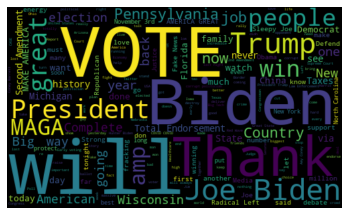

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# word cloud visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Trying NLTK

http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/

In [53]:
def transform_tweet(tweet):
    if tweet['Polarity'] > 0:
        return (tweet['text'], 'positive')
    else:
        return (tweet['text'], 'negative')
        

In [57]:
pos_tweets = []
neg_tweets = []
for index, row in df.iterrows():
    tweet = transform_tweet(row)
    if (tweet[1] == 'negative'):
        neg_tweets.append(tweet)
    else:
        pos_tweets.append(tweet)

len(neg_tweets)

591

In [58]:
tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

In [59]:
tweets

[(['pennsylvania:',
   'biden',
   'said',
   'that',
   'doesn’t',
   'want',
   'fracking.',
   'besides,',
   'and',
   'more',
   'importantly,',
   'his',
   'handlers',
   'won’t',
   'allow',
   'fracking.',
   'that',
   'would',
   'the',
   'end',
   'pennsylvania!'],
  'positive'),
 (['michigan',
   'was',
   'great!',
   'landing',
   'now',
   'dubuque,',
   'iowa.',
   'see',
   'you',
   'soon.'],
  'positive'),
 (['hispanics',
   'rally',
   'pres',
   'trump.',
   'huge',
   'new',
   'poll',
   'from',
   'abc',
   'news',
   'for',
   'fl.',
   'let’s',
   'go!',
   'latinosfortrump'],
  'positive'),
 (['under',
   'leadership,',
   'our',
   'economy',
   'now',
   'growing',
   'the',
   'fastest',
   'rate',
   'ever',
   'recorded—33.1%!',
   'while',
   'foreign',
   'nations',
   'are',
   'freefall,',
   'are',
   'creating',
   'the',
   'world’s',
   'greatest',
   'economic',
   'powerhouse!',
   'get',
   'out',
   'and',
   'vote',
   'november',
   '3rd,

In [63]:
import nltk

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

In [65]:
word_features = get_word_features(get_words_in_tweets(tweets))
word_features

dict_keys(['pennsylvania:', 'biden', 'said', 'that', 'doesn’t', 'want', 'fracking.', 'besides,', 'and', 'more', 'importantly,', 'his', 'handlers', 'won’t', 'allow', 'would', 'the', 'end', 'pennsylvania!', 'michigan', 'was', 'great!', 'landing', 'now', 'dubuque,', 'iowa.', 'see', 'you', 'soon.', 'hispanics', 'rally', 'pres', 'trump.', 'huge', 'new', 'poll', 'from', 'abc', 'news', 'for', 'fl.', 'let’s', 'go!', 'latinosfortrump', 'under', 'leadership,', 'our', 'economy', 'growing', 'fastest', 'rate', 'ever', 'recorded—33.1%!', 'while', 'foreign', 'nations', 'are', 'freefall,', 'creating', 'world’s', 'greatest', 'economic', 'powerhouse!', 'get', 'out', 'vote', 'november', '3rd,', 'can', 'keep', 'going!', 'maga', 'standing', 'global', 'special', 'interests', 'who', 'got', 'rich', 'bleeding', 'america', 'dry.', 'corrupt', 'establishment', 'hates', 'because', 'don’t', 'answer', 'them', 'you!', 'gop', 'rep.', 'jordan:', 'trump', 'winning', 'margin', '‘is', 'going', 'strong‘', '‘it‘s', 'no-doub

In [66]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [67]:
training_set = nltk.classify.apply_features(extract_features, tweets)

In [74]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [70]:
from nltk import ELEProbDist
def train(labeled_featuresets, estimator=ELEProbDist):
    # Create the P(label) distribution
    label_probdist = estimator(label_freqdist)
    # Create the P(fval|label, fname) distribution
    feature_probdist = {}
    return NaiveBayesClassifier(label_probdist, feature_probdist)

In [88]:
tweet = 'pennsylvania: is great!'
extract_features(tweet.split())

{'contains(pennsylvania:)': True,
 'contains(biden)': False,
 'contains(said)': False,
 'contains(that)': False,
 'contains(doesn’t)': False,
 'contains(want)': False,
 'contains(fracking.)': False,
 'contains(besides,)': False,
 'contains(and)': False,
 'contains(more)': False,
 'contains(importantly,)': False,
 'contains(his)': False,
 'contains(handlers)': False,
 'contains(won’t)': False,
 'contains(allow)': False,
 'contains(would)': False,
 'contains(the)': False,
 'contains(end)': False,
 'contains(pennsylvania!)': False,
 'contains(michigan)': False,
 'contains(was)': False,
 'contains(great!)': True,
 'contains(landing)': False,
 'contains(now)': False,
 'contains(dubuque,)': False,
 'contains(iowa.)': False,
 'contains(see)': False,
 'contains(you)': False,
 'contains(soon.)': False,
 'contains(hispanics)': False,
 'contains(rally)': False,
 'contains(pres)': False,
 'contains(trump.)': False,
 'contains(huge)': False,
 'contains(new)': False,
 'contains(poll)': False,
 'cont

In [89]:
classifier.classify(extract_features(tweet.split()))

'negative'